In [2]:
import xarray as xr
import numpy as np
import scipy as sp
import rasterio as rio
import os
import matplotlib.pyplot as plt

In [3]:
def read_precip() -> np.ndarray:
    data_frame_list = []
    for i in os.listdir(os.path.join("/home/zyzh0/coding/risk_evaluation/scripts/outputs/PRECIP")):
        filename  = os.path.join("/home/zyzh0/coding/risk_evaluation/scripts/outputs/PRECIP",i)
        data_frame = xr.open_dataset(filename,decode_coords="all").to_array()[0,:,:,:]
        data_frame_list.append(data_frame)
    return np.concatenate(data_frame_list,axis=0)

In [4]:
precip_array = read_precip()[0:192,:,:]*0.1

precip_avg = np.mean(precip_array,axis=0)

precip_variability = []

for i in range(0,16):
    june_precip = precip_array[i*12+5,:,:]
    july_precip = precip_array[i*12+6,:,:]
    august_precip = precip_array[i*12+7,:,:]
    september_precip = precip_array[i*12+8,:,:]
    avg_precip = (july_precip+august_precip+september_precip+june_precip)
    precip_variability.append((avg_precip-precip_avg)/precip_avg)

precip_variability = np.array(precip_variability)

In [5]:
np.nanmax(precip_variability)

16.131853

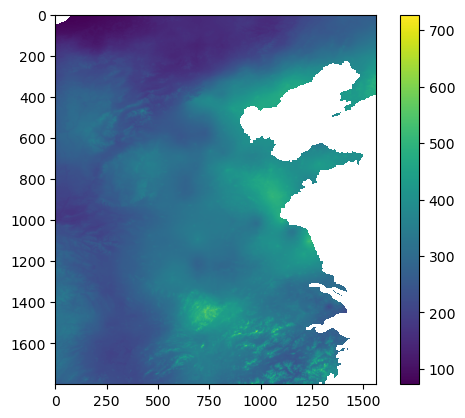

In [10]:
plt.imshow(precip_array[6,:,:]+precip_array[7,:,:])
plt.colorbar()
plt.show()